# Data cleaning code for AI Patent Explorer Project - CIS550 2023 Spring
## Team members: Luna Fang, Evan Roberts, Qi Zhang

## Datasets used for this project:

### AllPatentsWithAICategory table

“ai_model_predictions.tsv” – 
https://www.uspto.gov/ip-policy/economic-research/research-datasets/artificial-intelligence-patent-dataset

### Assignee table
“g_assignee_disambiguated.tsv” – 
https://patentsview.org/download/data-download-tables

“g_location_disambiguated.tsv” - 
https://patentsview.org/download/data-download-tables

“data.csv” - 
https://datahub.io/core/country-list


### Content table
“g_patent.tsv” - 
https://patentsview.org/download/data-download-tables


### Inventors table
“g_inventor_not_disambiguated.tsv” – 
https://patentsview.org/download/data-download-tables




In [2]:
import pandas as pd
import numpy as np


## Data importation


Data sets are imported from the above-mentioned sources

To import the data, first copy the dataset into your Drive by following [this link](https://drive.google.com/open?id=1WB60Q6VJYyjbE8h8WED2mfi8Ae8LzoRU) and clicking on the "Add shortcut to Drive" link in the upper-right corner. Remember where your store it in your drive. 


Next, mount your Google Drive to the notebook by running the code cell below. This will allow you to import any files in your drive to the Python Runtime Environment that the notebook is using. When you run the code cell, Google Drive may ask you to re-login to your account and paste a verification code into a popup below the cell.


In [3]:
prefix = '/content/drive'
from google.colab import drive
drive.mount(prefix, force_remount=True)

Mounted at /content/drive


Now, you should see a directory named "drive" when you click the Files icon on the left. Expand this directory and navigate to the location you saved the census data. Control-click (right-click for PC) on the file and select "copy path". Then, paste the path into `file_path` variable in the cell below and run the cell. 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
file_path = '/content/drive/My Drive/g_assignee_disambiguated.tsv' 

file_path3 = '/content/drive/My Drive/g_location_disambiguated.tsv'
file_path4 = '/content/drive/My Drive/country_code.csv'

file_path6 = '/content/drive/My Drive/ai_model_predictions.tsv'
file_path7 = '/content/drive/My Drive/g_patent.tsv'
file_path8 = '/content/drive/My Drive/g_inventor_not_disambiguated.tsv'
file_path9 = '/content/drive/My Drive/ai_patent_cut.csv'


The dataset is stored as a CSV, so we'll load it into a `DataFrame` using `pandas.read_csv` in the code cell below. `Pandas` also defines a number of other [IO functions](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) that load the contents of common file types directly into `DataFrames`.

## Step 1

We first combine g_assignee_disambiguated.tsv, g_location_disambiguated.tsv and country_code.csv into a grand assignee dataset with all the information we need for assignees.

In [7]:
#Import the main large dataset for Assignee
assignee = pd.read_table(file_path, low_memory=False)
assignee.head()

,patent_id,assignee_sequence,assignee_id,disambig_assignee_individual_name_first,disambig_assignee_individual_name_last,disambig_assignee_organization,assignee_type,location_id
0,4488683,0,52b2c3f2-9b5a-4041-9e6d-5156fa00969e,NaN,NaN,Metal Works Ramat David,3.0,50dc5d46-16c8-11ed-9b5f-1234bde3cd05
1,5856666,0,1afe6500-272c-4a60-b42f-960b8903fad1,NaN,NaN,U.S. Philips Corporation,2.0,92237ca2-16c8-11ed-9b5f-1234bde3cd05
2,5204210,0,dafe8639-fa34-490b-80fd-f675ca7766db,NaN,NaN,Xerox Corporation,2.0,0cd1998f-16c8-11ed-9b5f-1234bde3cd05
3,5302149,1,b3374f91-6d03-45aa-9d23-dba3bc68cef4,NaN,NaN,Commonwealth Scientific and Industrial Researc...,3.0,4d36742f-16c8-11ed-9b5f-1234bde3cd05
4,D397841,0,b3d5781f-7f26-4d43-be4a-898d5dfcaa87,NaN,NaN,ADIDAS AG,3.0,280c9de4-16c8-11ed-9b5f-1234bde3cd05


In [8]:
assignee.shape

(7596786, 8)

In [9]:
#Import the location dataset
location = pd.read_table(file_path3, low_memory=False)
location.head()

,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
0,233cc488-16c8-11ed-9b5f-1234bde3cd05,Kabul,NaN,AF,34.526011,69.177684,NaN,NaN,NaN
1,8d61686e-16c8-11ed-9b5f-1234bde3cd05,Jalalabad,NaN,AF,34.430195,70.460128,NaN,NaN,NaN
2,4ce1cf12-16c8-11ed-9b5f-1234bde3cd05,Kunduz,NaN,AF,36.717557,68.867292,NaN,NaN,NaN
3,60eb1c9d-16c8-11ed-9b5f-1234bde3cd05,Balkh,NaN,AF,36.758126,66.898083,NaN,NaN,NaN
4,15c50d13-16c8-11ed-9b5f-1234bde3cd05,Sra,NaN,AF,34.238758,69.640206,NaN,NaN,NaN


In [10]:
location.shape

(81837, 9)

In [11]:
#Import the country code dataset
country_code = pd.read_csv(file_path4, low_memory=False)
country_code.head()

,Name,Code
0,Afghanistan,AF
1,??land Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [12]:
country_code.shape

(248, 2)

In [13]:
#Add location information to assignees by joining
assignee_location = pd.merge(assignee, location, on='location_id', how='left')
assignee_location.head()

,patent_id,assignee_sequence,assignee_id,disambig_assignee_individual_name_first,disambig_assignee_individual_name_last,disambig_assignee_organization,assignee_type,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
0,4488683,0,52b2c3f2-9b5a-4041-9e6d-5156fa00969e,NaN,NaN,Metal Works Ramat David,3.0,50dc5d46-16c8-11ed-9b5f-1234bde3cd05,Netivot,NaN,IL,31.421355,34.588425,NaN,NaN,NaN
1,5856666,0,1afe6500-272c-4a60-b42f-960b8903fad1,NaN,NaN,U.S. Philips Corporation,2.0,92237ca2-16c8-11ed-9b5f-1234bde3cd05,New York,NY,US,40.712728,-74.006015,New York,36.0,61.0
2,5204210,0,dafe8639-fa34-490b-80fd-f675ca7766db,NaN,NaN,Xerox Corporation,2.0,0cd1998f-16c8-11ed-9b5f-1234bde3cd05,Stamford,CT,US,41.053430,-73.538734,Fairfield,9.0,1.0
3,5302149,1,b3374f91-6d03-45aa-9d23-dba3bc68cef4,NaN,NaN,Commonwealth Scientific and Industrial Researc...,3.0,4d36742f-16c8-11ed-9b5f-1234bde3cd05,Tuggeranong,NaN,AU,-35.420977,149.092134,NaN,NaN,NaN
4,D397841,0,b3d5781f-7f26-4d43-be4a-898d5dfcaa87,NaN,NaN,ADIDAS AG,3.0,280c9de4-16c8-11ed-9b5f-1234bde3cd05,Schlotheim,NaN,DE,51.246803,10.656751,NaN,NaN,NaN


In [14]:
#Further add full country names to assignees by joining
assignee_location_country = pd.merge(assignee_location, country_code, left_on='disambig_country', right_on='Code',how='left')
assignee_location_country.head()


,patent_id,assignee_sequence,assignee_id,disambig_assignee_individual_name_first,disambig_assignee_individual_name_last,disambig_assignee_organization,assignee_type,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips,Name,Code
0,4488683,0,52b2c3f2-9b5a-4041-9e6d-5156fa00969e,NaN,NaN,Metal Works Ramat David,3.0,50dc5d46-16c8-11ed-9b5f-1234bde3cd05,Netivot,NaN,IL,31.421355,34.588425,NaN,NaN,NaN,Israel,IL
1,5856666,0,1afe6500-272c-4a60-b42f-960b8903fad1,NaN,NaN,U.S. Philips Corporation,2.0,92237ca2-16c8-11ed-9b5f-1234bde3cd05,New York,NY,US,40.712728,-74.006015,New York,36.0,61.0,United States,US
2,5204210,0,dafe8639-fa34-490b-80fd-f675ca7766db,NaN,NaN,Xerox Corporation,2.0,0cd1998f-16c8-11ed-9b5f-1234bde3cd05,Stamford,CT,US,41.053430,-73.538734,Fairfield,9.0,1.0,United States,US
3,5302149,1,b3374f91-6d03-45aa-9d23-dba3bc68cef4,NaN,NaN,Commonwealth Scientific and Industrial Researc...,3.0,4d36742f-16c8-11ed-9b5f-1234bde3cd05,Tuggeranong,NaN,AU,-35.420977,149.092134,NaN,NaN,NaN,Australia,AU
4,D397841,0,b3d5781f-7f26-4d43-be4a-898d5dfcaa87,NaN,NaN,ADIDAS AG,3.0,280c9de4-16c8-11ed-9b5f-1234bde3cd05,Schlotheim,NaN,DE,51.246803,10.656751,NaN,NaN,NaN,Germany,DE


In [15]:
assignee_out = assignee_location_country.copy()
assignee_out = assignee_out[['patent_id',	'assignee_sequence', 'disambig_assignee_individual_name_first',	'disambig_assignee_individual_name_last',	'disambig_assignee_organization',	'disambig_city',	'disambig_state',	'disambig_country',	'Name']]
assignee_out.head()


,patent_id,assignee_sequence,disambig_assignee_individual_name_first,disambig_assignee_individual_name_last,disambig_assignee_organization,disambig_city,disambig_state,disambig_country,Name
0,4488683,0,NaN,NaN,Metal Works Ramat David,Netivot,NaN,IL,Israel
1,5856666,0,NaN,NaN,U.S. Philips Corporation,New York,NY,US,United States
2,5204210,0,NaN,NaN,Xerox Corporation,Stamford,CT,US,United States
3,5302149,1,NaN,NaN,Commonwealth Scientific and Industrial Researc...,Tuggeranong,NaN,AU,Australia
4,D397841,0,NaN,NaN,ADIDAS AG,Schlotheim,NaN,DE,Germany


In [16]:
assignee_out_renamed = assignee_out.rename(columns={"disambig_assignee_individual_name_first": "assignee_individual_name_first", "disambig_assignee_individual_name_last": "assignee_individual_name_last", "disambig_assignee_organization": "assignee_organization", "disambig_city": "city", "disambig_state": "state", "disambig_country": "country_code", "Name": "country"})

assignee_out_renamed.shape

(7596786, 9)

In [17]:
dfa = assignee_out_renamed.groupby("country")["country"].count()
print(dfa)


country
Afghanistan                  14
Albania                       4
Algeria                      21
Andorra                      30
Anguilla                     57
                           ... 
Viet Nam                    105
Virgin Islands, British    4570
Yemen                         2
Zambia                        1
Zimbabwe                      4
Name: country, Length: 179, dtype: int64


In [ ]:
#Output the large assignee dataset with all necessary information. But this will be further reduced later. 
assignee_out_renamed.to_csv('/content/drive/My Drive/assignee_out.csv',index=False)  

In [18]:
file_path5 = '/content/drive/My Drive/assignee_out.csv'
assignee_out = pd.read_csv(file_path5, low_memory=False)
assignee_out.head()


,patent_id,assignee_sequence,assignee_individual_name_first,assignee_individual_name_last,assignee_organization,city,state,country_code,country
0,4488683,0,NaN,NaN,Metal Works Ramat David,Netivot,NaN,IL,Israel
1,5856666,0,NaN,NaN,U.S. Philips Corporation,New York,NY,US,United States
2,5204210,0,NaN,NaN,Xerox Corporation,Stamford,CT,US,United States
3,5302149,1,NaN,NaN,Commonwealth Scientific and Industrial Researc...,Tuggeranong,NaN,AU,Australia
4,D397841,0,NaN,NaN,ADIDAS AG,Schlotheim,NaN,DE,Germany


In [19]:
assignee_out.shape

(7596786, 9)

In [20]:
assignee_out.head()

,patent_id,assignee_sequence,assignee_individual_name_first,assignee_individual_name_last,assignee_organization,city,state,country_code,country
0,4488683,0,NaN,NaN,Metal Works Ramat David,Netivot,NaN,IL,Israel
1,5856666,0,NaN,NaN,U.S. Philips Corporation,New York,NY,US,United States
2,5204210,0,NaN,NaN,Xerox Corporation,Stamford,CT,US,United States
3,5302149,1,NaN,NaN,Commonwealth Scientific and Industrial Researc...,Tuggeranong,NaN,AU,Australia
4,D397841,0,NaN,NaN,ADIDAS AG,Schlotheim,NaN,DE,Germany


In [21]:
assignee_out.dtypes

patent_id                         object
assignee_sequence                  int64
assignee_individual_name_first    object
assignee_individual_name_last     object
assignee_organization             object
city                              object
state                             object
country_code                      object
country                           object
dtype: object

## Step 2

We import the main dataset for AllPatentsWithAICategory. The dataset include all issued patents from 1976 to 2020, which is too huge to manage. So we reduce it to a set that's only with AI-related patents issued from 2010 to 2020.

In [22]:
#Import the main dataset for AllPatentsWithAICategory
file_path6 = '/content/drive/My Drive/ai_model_predictions.tsv'
ai_patent = pd.read_table(file_path6, low_memory=False)
ai_patent.head()


,doc_id,flag_patent,pub_dt,appl_id,flag_train_any,predict50_any_ai,flag_train_ml,ai_score_ml,predict50_ml,flag_train_evo,...,flag_train_kr,ai_score_kr,predict50_kr,flag_train_planning,ai_score_planning,predict50_planning,flag_train_hardware,ai_score_hardware,predict50_hardware,analysis_phase
0,20170299591,0,2017-10-19,15377054,0,0,0,0.000272,0,0,...,0,0.001303,0,0,0.009602,0,0,0.002375,0,1
1,20170128481,0,2017-05-11,14795790,0,0,0,0.000864,0,0,...,0,0.000979,0,0,0.000803,0,0,0.000264,0,1
2,20040254117,0,2004-12-16,09908955,0,0,0,0.000881,0,0,...,0,0.000365,0,0,0.000420,0,0,0.001134,0,1
3,20160167428,0,2016-06-16,14160226,0,0,0,0.001941,0,0,...,0,0.000376,0,0,0.002621,0,0,0.000597,0,1
4,RE38534,1,2004-06-15,10010151,0,0,0,0.000158,0,0,...,0,0.002016,0,0,0.000511,0,0,0.001163,0,1


In [23]:
ai_patent.shape

(13244037, 31)

In [24]:
ai_patent.dtypes

doc_id                  object
flag_patent              int64
pub_dt                  object
appl_id                 object
flag_train_any           int64
predict50_any_ai         int64
flag_train_ml            int64
ai_score_ml            float64
predict50_ml             int64
flag_train_evo           int64
ai_score_evo           float64
predict50_evo            int64
flag_train_nlp           int64
ai_score_nlp           float64
predict50_nlp            int64
flag_train_speech        int64
ai_score_speech        float64
predict50_speech         int64
flag_train_vision        int64
ai_score_vision        float64
predict50_vision         int64
flag_train_kr            int64
ai_score_kr            float64
predict50_kr             int64
flag_train_planning      int64
ai_score_planning      float64
predict50_planning       int64
flag_train_hardware      int64
ai_score_hardware      float64
predict50_hardware       int64
analysis_phase           int64
dtype: object

In [25]:
ai_patent_renamed = ai_patent[['doc_id','flag_patent','pub_dt','predict50_any_ai','ai_score_ml','predict50_ml','ai_score_evo','predict50_evo','ai_score_nlp','predict50_nlp','ai_score_speech','predict50_speech','ai_score_vision','predict50_vision','ai_score_kr','predict50_kr','ai_score_planning','predict50_planning','ai_score_hardware','predict50_hardware']]

ai_patent_renamed.shape

(13244037, 20)

In [26]:
#ai_patent_renamed.head(100)

In [27]:
#We decided to only work with patents from 2010 to 2020 so that the database is much more manageable.
ai_patent_renamed = ai_patent_renamed[(ai_patent_renamed['pub_dt'] >= '2010-01-01') & (ai_patent_renamed['pub_dt'] <= '2020-12-31')]
#ai_patent_renamed.head()

In [28]:
ai_patent_renamed['pub_yr'] = pd.DatetimeIndex(ai_patent_renamed['pub_dt']).year

In [29]:
#We decided to only work with issued patents that are related to ai.
ai_patent_renamed = ai_patent_renamed.loc[ai_patent_renamed['flag_patent'] == 1]
ai_patent_renamed = ai_patent_renamed.loc[ai_patent_renamed['predict50_any_ai'] == 1]
ai_patent_renamed.shape

(474295, 21)

<Axes: >

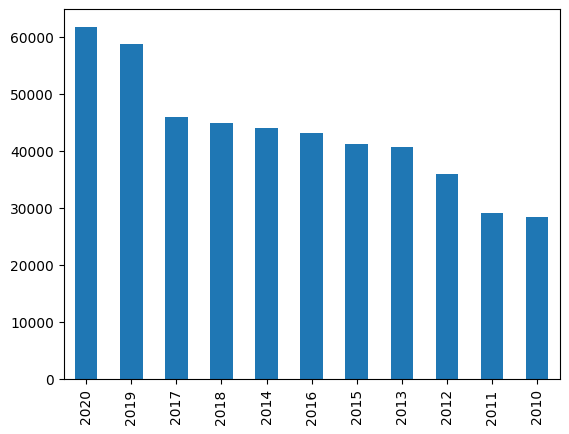

In [ ]:
ai_patent_renamed['pub_yr'].value_counts().plot(kind='bar')

In [30]:
ai_patent_renamed.dtypes

doc_id                 object
flag_patent             int64
pub_dt                 object
predict50_any_ai        int64
ai_score_ml           float64
predict50_ml            int64
ai_score_evo          float64
predict50_evo           int64
ai_score_nlp          float64
predict50_nlp           int64
ai_score_speech       float64
predict50_speech        int64
ai_score_vision       float64
predict50_vision        int64
ai_score_kr           float64
predict50_kr            int64
ai_score_planning     float64
predict50_planning      int64
ai_score_hardware     float64
predict50_hardware      int64
pub_yr                  int64
dtype: object

In [ ]:
#This csv file is used for the AllPatentsWithAICategory table.
ai_patent_renamed.to_csv('/content/drive/My Drive/ai_patent.csv',index=False) 

In [ ]:
#Keep only 3 columns from ai_patent dataset for joining with other tables to reduce their sizes
ai_patent_cut = ai_patent_renamed[['doc_id','pub_dt','pub_yr']]
ai_patent_cut.shape
#Save it for the record
ai_patent_cut.to_csv('/content/drive/My Drive/ai_patent_cut.csv',index=False)  

In [6]:
#Read back the reduced AllPatentsWithAICategory table for future joins.
ai_reduced = pd.read_csv(file_path9, low_memory=False)
ai_reduced.head()

,doc_id,pub_dt,pub_yr
0,10147023,2018-12-04,2018
1,10146776,2018-12-04,2018
2,10145875,2018-12-04,2018
3,8650542,2014-02-11,2014
4,10147208,2018-12-04,2018


## Step 3

We join the large assignee dataset we constructed in step 1 with the reduced AI dataset from step 2. So we have a reduced assignee dataset that also has only AI-related patents from 2010 to 2020 for the Assignee table.

In [33]:
#Join the original assignee dataset with the reduced ai dataset to get the reduced assignee dataset
assignee_ai = pd.merge(ai_reduced, assignee_out, left_on='doc_id', right_on='patent_id',how='inner')
assignee_ai.shape

(466811, 12)

In [34]:
assignee_ai['patent_id'].describe()

count      466811
unique     456988
top       7853412
freq           12
Name: patent_id, dtype: object

<Axes: >

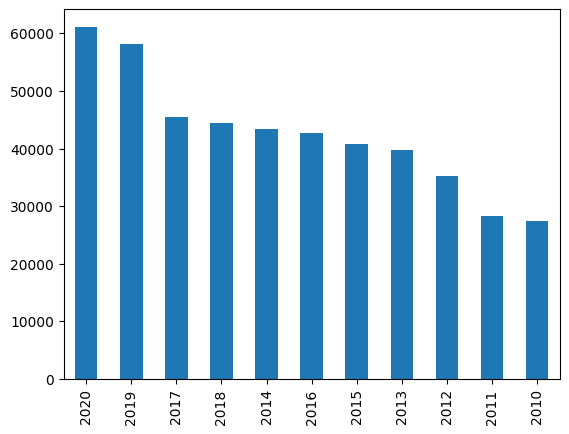

In [ ]:
assignee_ai['pub_yr'].value_counts().plot(kind='bar')

In [ ]:
assignee_ai.head(5)

,doc_id,pub_dt,pub_yr,patent_id,assignee_sequence,assignee_individual_name_first,assignee_individual_name_last,assignee_organization,city,state,country_code,country
0,10147023,2018-12-04,2018,10147023,0,NaN,NaN,"Disney Enterprises, Inc.",Burbank,CA,US,United States
1,10146776,2018-12-04,2018,10146776,0,NaN,NaN,GOOGLE LLC,Mountain View,CA,US,United States
2,8650542,2014-02-11,2014,8650542,0,NaN,NaN,"The MathWorks, Inc.",Natick,MA,US,United States
3,10147208,2018-12-04,2018,10147208,0,NaN,NaN,SAP SE,NaN,NaN,NaN,NaN
4,8346687,2013-01-01,2013,8346687,0,NaN,NaN,KDDI CORPORATION,Tokyo,NaN,JP,Japan


In [35]:
#Keep only the attributes that will appear in the final Assignee table
assignee_ai_out = assignee_ai[['patent_id','assignee_sequence','assignee_individual_name_first','assignee_individual_name_last','assignee_organization','city','state','country_code','country']]

In [ ]:
#This csv file is output to be used for the Assignee table.
assignee_ai_out.to_csv('/content/drive/My Drive/assignee_ai_out.csv',index=False)  

## Step 4

We import a large patent content dataset with patent title/abstract/wipo-type information with the reduced AI dataset from step 2. So we have a reduced content dataset that also has only AI-related patents from 2010 to 2020 for the Content table.

In [36]:
#Import the main dataset for Content
content = pd.read_table(file_path7, low_memory=False)
content.head()

,patent_id,patent_type,patent_date,patent_title,patent_abstract,wipo_kind,num_claims,withdrawn,filename
0,10000000,utility,2018-06-19,Coherent LADAR using intra-pixel quadrature de...,A frequency modulated (coherent) laser detecti...,B2,20,0,ipg180619.xml
1,10000001,utility,2018-06-19,Injection molding machine and mold thickness c...,The injection molding machine includes a fixed...,B2,12,0,ipg180619.xml
2,10000002,utility,2018-06-19,Method for manufacturing polymer film and co-e...,The present invention relates to: a method for...,B2,9,0,ipg180619.xml
3,10000003,utility,2018-06-19,Method for producing a container from a thermo...,The invention relates to a method for producin...,B2,18,0,ipg180619.xml
4,10000004,utility,2018-06-19,"Process of obtaining a double-oriented film, c...",The present invention relates to provides a do...,B2,6,0,ipg180619.xml


In [37]:
#Keep only the attributes that will appear in the final Content table
content_cut = content[['patent_id','patent_type','patent_title','patent_abstract','wipo_kind']]

In [39]:
#Join the original Content dataset with the reduced ai dataset to get the reduced content dataset
content_ai = pd.merge(ai_reduced, content_cut, left_on='doc_id', right_on='patent_id',how='inner')
content_ai.shape

(474295, 8)

In [40]:
#After join, keep only the attributes that will appear in the final Content table
content_ai_out = content_ai[['patent_id','patent_type','patent_title','patent_abstract','wipo_kind']]

In [ ]:
#This csv file is output to be used for the Content table.
content_ai_out.to_csv('/content/drive/My Drive/content_ai_out.csv',index=False)  

## Step 5

Similarly, We import a large patent inventors dataset with patent inventor information with the reduced AI dataset from step 2. So we have a reduced inventors dataset that also has only AI-related patents from 2010 to 2020 for the Inventors table.

In [7]:
#Import the main dataset for Inventors
inventors = pd.read_table(file_path8, low_memory=False)
inventors.head()

,patent_id,inventor_sequence,inventor_id,raw_inventor_name_first,raw_inventor_name_last,deceased_flag,rawlocation_id
0,6584128,0,fl:ri_ln:kroeger-1,Richard,Kroeger,False,o2ema6bl3kkh6iwziprbzu4m9
1,4789863,0,fl:th_ln:bush-1,Thomas A.,Bush,False,tkz70bmoqx88n1lfz3fl657lh
2,11161990,1,fl:ma_ln:boudreaux-4,Matthew F.,Boudreaux,False,up8ym622ssh09vpqv9rdsygs0
3,6795487,1,fl:ge_ln:whitworth-1,Gerald,Whitworth,False,96s3xenagksk3dyad1r777a9e
4,D474886,0,fl:th_ln:fleming-4,Thomas W.,Fleming,False,cmf9hebugybql8ufffo47uwcz


In [8]:
#Keep only the attributes that will appear in the final Inventors table
inventors_cut = inventors[['patent_id','inventor_sequence','inventor_id','raw_inventor_name_first','raw_inventor_name_last']]

In [9]:
#Join the original inventors dataset with the reduced ai dataset to get the reduced inventors dataset
inventors_ai = pd.merge(ai_reduced, inventors_cut, left_on='doc_id', right_on='patent_id',how='inner')
inventors_ai.shape

(1408945, 8)

In [10]:
inventors_ai['patent_id'].describe()

count     1408945
unique     474295
top       8606723
freq           65
Name: patent_id, dtype: object

In [ ]:
#After join, keep only the attributes that will appear in the final Inventors table
inventors_ai_out = inventors_ai[['patent_id','inventor_sequence','inventor_id','raw_inventor_name_first','raw_inventor_name_last']]

In [ ]:
#This csv file is output to be used for the Inventors table.
inventors_ai_out.to_csv('/content/drive/My Drive/inventors_ai_out.csv',index=False) 